In [20]:
!pip install datetime numpy pandas matplotlib


In [21]:
import numpy as np
from datetime import datetime, date, timedelta
import pandas as pd
import random
import matplotlib.pyplot as plt


In [108]:
def Algorithme(date_list: list[datetime.date]) -> float:
        """
            - Algorithme de calcul de score
            - Paramètres: liste de dates [date1, date2, ...]
            - Retourne: score float
        """
        if date_list == []:
            return 0
        # Création d'un dictionnaire de dates et de leur fréquence
        date_count: dict[datetime.date, int] = {}
        for date in date_list:
            if date in date_count:
                date_count[date] += 1
            else:
                date_count[date] = 1

        # Tri du dictionnaire par date
        date_count = dict(sorted(date_count.items(), key=lambda item: item[0]))

        # Récupération de la première et dernière date
        first_date = list(date_count.keys())[0]
        last_date = datetime.now().date()

        # Création d'une liste de dates entre la première et la dernière date au format YYYY-MM-DD
        date_range = [first_date + timedelta(days=x) for x in range((last_date - first_date).days + 1)]

        # Création d'une liste de fréquences de dates
        date_freq = [date_count.get(date, 0) for date in date_range]

        # Création de la courbe de diminution (10/(x+1))
        j = len(date_freq)
        decrease_curve = [0.5/(i+0.1) for i in range(j)]

        # Calcul du score (somme du jour * valeur courbe de diminution du jour)
        date_freq = list(reversed(date_freq))
        score = np.sum(np.array(date_freq) * np.array(decrease_curve))
        return score

In [12]:
# Helper function to generate random dates within a range
def generate_dates(start_date: date, end_date: date, num_dates: int) -> list:
    delta = (end_date - start_date).days
    return [start_date + timedelta(days=random.randint(0, delta)) for _ in range(num_dates)]

# First case: Many reports at the beginning of the year, then it calms down
def case_1() -> list:
    dates = []
    # Generate many reports in the first 3 months (30 reports per week)
    for week in range(13):
        dates += generate_dates(date(2024, 1, 1) + timedelta(weeks=week), date(2024, 1, 1) + timedelta(weeks=week + 1), 30)
    # Generate few reports for the rest of the year (1 report per week)
    for week in range(14, 40):
        dates += generate_dates(date(2024, 1, 1) + timedelta(weeks=week), date(2024, 1, 1) + timedelta(weeks=week + 1), 1)
    return sorted(dates)

# Second case: Many reports around May, then it calms down
def case_2() -> list:
    dates = []
    # Generate many reports in May and June (30 reports per week)
    for week in range(17, 22):
        dates += generate_dates(date(2024, 1, 1) + timedelta(weeks=week), date(2024, 1, 1) + timedelta(weeks=week + 1), 30)
    # Generate few reports for the rest of the year (1 report per week)
    for week in range(40):
        if week not in range(17, 22):
            dates += generate_dates(date(2024, 1, 1) + timedelta(weeks=week), date(2024, 1, 1) + timedelta(weeks=week + 1), 1)
    return sorted(dates)

# Third case: Regular reports throughout the year (4-5 reports per month)
def case_3() -> list:
    dates = []
    # Generate regular reports each month
    for month in range(1, 11):
        num_reports = random.randint(4, 5)
        dates += generate_dates(date(2024, month, 1), date(2024, month, 28), num_reports)
    return sorted(dates)

# Fourth case: Many reports in September and October
def case_4() -> list:
    dates = []
    # Generate few reports for the first 8 months (1 report per week)
    for week in range(35):
        dates += generate_dates(date(2024, 1, 1) + timedelta(weeks=week), date(2024, 1, 1) + timedelta(weeks=week + 1), 1)
    # Generate many reports in September and October (30 reports per week)
    for week in range(35, 42):
        dates += generate_dates(date(2024, 1, 1) + timedelta(weeks=week), date(2024, 1, 1) + timedelta(weeks=week + 1), 30)
    return sorted(dates)


In [13]:

# Generate the data for all four cases
case_1_dates = case_1()
case_2_dates = case_2()
case_3_dates = case_3()
case_4_dates = case_4()



In [19]:
dates_dict = {
    "Case 1": case_1_dates,
    "Case 2": case_2_dates,
    "Case 3": case_3_dates,
    "Case 4": case_4_dates,
}

In [22]:
def plot_case_graph(case_dates, case_name):
    # Create a DataFrame from the dates
    df = pd.DataFrame(case_dates, columns=['date'])
    # Count the occurrences of each date
    df_count = df['date'].value_counts().sort_index()

    # Plot the graph
    plt.figure(figsize=(10, 6))
    df_count.plot(kind='bar', color='skyblue')
    plt.title(f'Number of Reports per Day - {case_name}')
    plt.xlabel('Date')
    plt.ylabel('Number of Reports')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


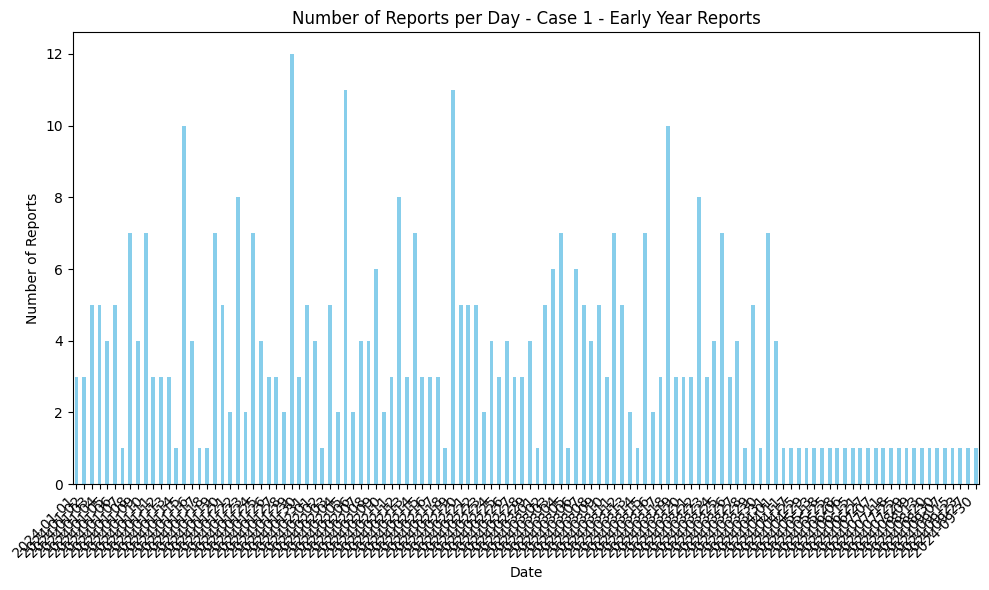

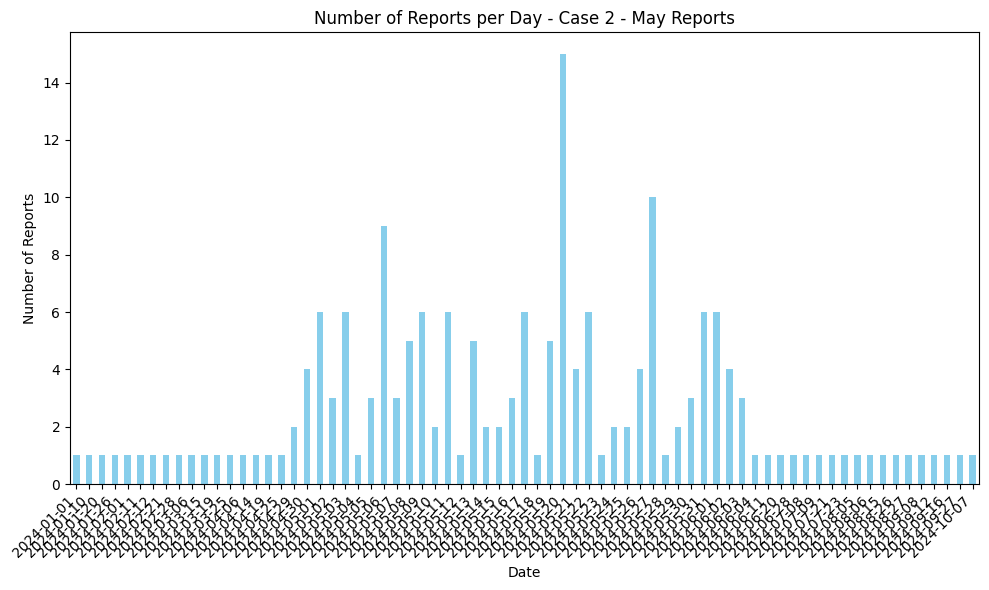

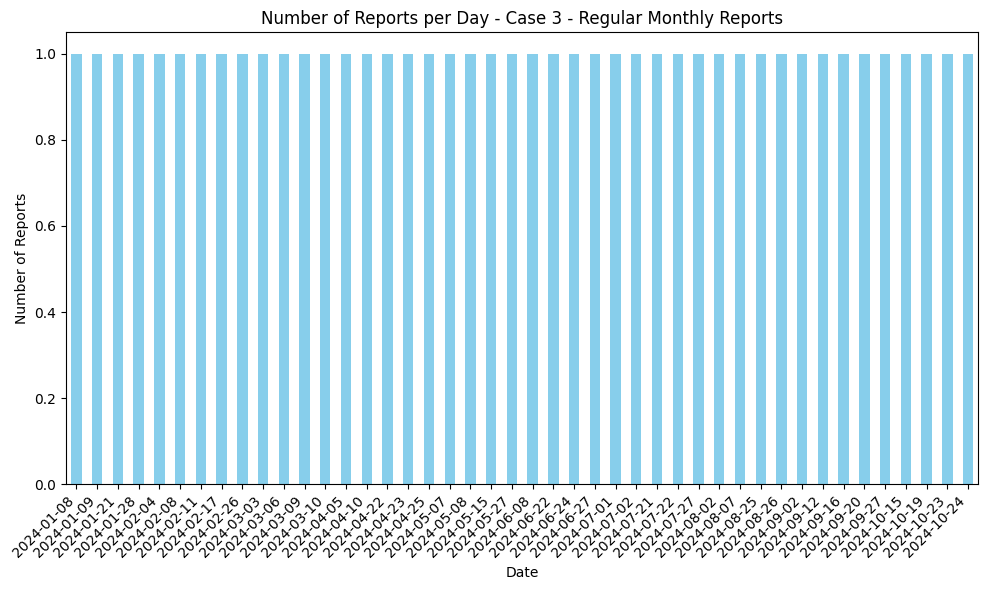

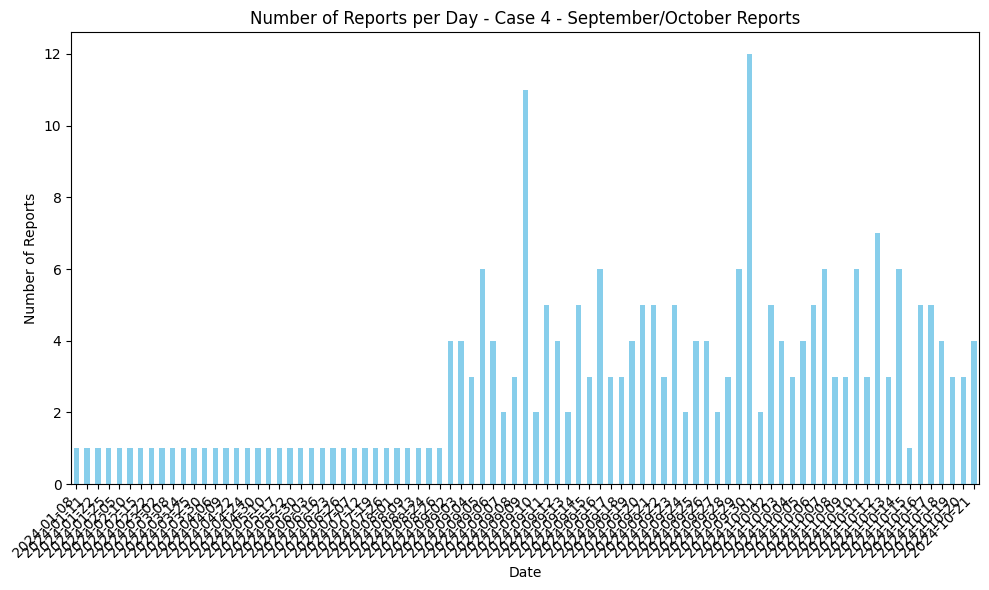

In [25]:
plot_case_graph(case_1_dates, "Case 1 - Early Year Reports")
plot_case_graph(case_2_dates, "Case 2 - May Reports")
plot_case_graph(case_3_dates, "Case 3 - Regular Monthly Reports")
plot_case_graph(case_4_dates, "Case 4 - September/October Reports")



In [102]:
Algorithme(case_1_dates)

1.0314794673042724

In [103]:
Algorithme(case_2_dates)

0.7515915288671666

In [104]:
Algorithme(case_3_dates)

5.22319117019911

In [106]:
Algorithme(case_4_dates)

14.96940624966455

In [109]:
Algorithme([])

0